## Imports

In [3]:
!pip3 install emoji

  Using cached emoji-2.8.0-py2.py3-none-any.whl (358 kB)


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import time
import datetime
import numpy as np
import csv
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import log_loss
from sklearn.ensemble import GradientBoostingClassifier
import emoji
from sklearn.model_selection import GridSearchCV

## Reading in Data

In [5]:
data = pd.read_csv('train.csv', error_bad_lines = False)
data_test = pd.read_csv('test.csv')

<ipython-input-5-75f625eff17a>:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  data = pd.read_csv('train.csv', error_bad_lines = False)


In [6]:
data2 = data[['id']]
data_test2 = data_test[['id']]

## Encoding Categorial Variables

### Summary: We decided to encode 7 of the categorical variables.

In [7]:
# Encoding Font

font_encoding = LabelEncoder()
font_encoding.fit(data['font'])
data2.insert(1, "Font Encoded", font_encoding.transform(data['font']), True)

# Theme Encoding

theme_encoding = LabelEncoder()
theme_encoding.fit(data['parameters_theme'])
data2.insert(1, 'Theme Encoded', theme_encoding.transform(data['parameters_theme']), True)


# Tone Encoding

tone_encoding = LabelEncoder()
tone_encoding.fit(data['parameters_tone'])
data2.insert(1, 'Tone Encoded', tone_encoding.transform(data['parameters_tone']), True)

# User Edited Encoding

edit_encoding = LabelEncoder()
edit_encoding.fit(data['user_edited'])
data2.insert(1, 'User Edited Encoded', edit_encoding.transform(data['user_edited']), True)

# Has Logo Encoding

logo_encoding = LabelEncoder()
logo_encoding.fit(data['has_logo'])
data2.insert(1, 'Has Logo Encoded', logo_encoding.transform(data['has_logo']), True)

# Approved Encoding

approved_encoding = LabelEncoder()
approved_encoding.fit(data['approved'])
data2.insert(0, 'Approved Encoded', approved_encoding.transform(data['approved']), True)

#Prompt Template
prompt_encoding = LabelEncoder()
prompt_encoding.fit(data['parameters_prompt_template_name'])
data2.insert(0, 'Prompt Template Encoded', approved_encoding.transform(data['parameters_prompt_template_name']), True)

#Switchboard Template
switchboard_encoding = LabelEncoder()
switchboard_encoding.fit(data['parameters_switchboard_template_name'])
data2.insert(0, 'Switchboard Template Encoded', approved_encoding.transform(data['parameters_switchboard_template_name']), True)

In [8]:
xtrain = data2

## Adding Training Columns

In [9]:
# Post Days Old
current = datetime.datetime.now()

train_days_old = []

print(current)
for i in data['created_at']:

  t_location = i.index('T')
  date_str = i[:10] + ' ' + i[11:]
  datetime_object = datetime.datetime.strptime(date_str, '%Y-%m-%d %H:%M:%S.%f')
  days = (current - datetime_object).days
  train_days_old.append(days)

# User Days Old
current = datetime.datetime.now()

train_user_days_old = []

for i in data['user_created_at']:

  date_str = i[:10] + ' ' + i[11:]
  datetime_object = datetime.datetime.strptime(date_str, '%Y-%m-%d %H:%M:%S.%f')
  days = (current - datetime_object).days
  train_user_days_old.append(days)

# Length of Caption
caption_len = []

for i in data['caption']:

  words = len(i.split())
  caption_len.append(words)

2023-10-29 14:55:44.297882


In [10]:
xtrain = data2[['Has Logo Encoded', 'User Edited Encoded', 'Tone Encoded', 'Theme Encoded', 'Font Encoded', 'Prompt Template Encoded', 'Switchboard Template Encoded']]

ytrain = data2['Approved Encoded']

In [11]:
# Hashtag Included
yes_no = list()
for caption in data['caption']:
  if('#' in caption):
      yes_no.append(1)
  else:
      yes_no.append(0)

In [12]:
train_has_emoji = []
for cap in data['caption']:
  emo = False
  for character in cap:
        if character in emoji.EMOJI_DATA:
            emo = True
  if (emo):
    train_has_emoji.append(1)
  else:
    train_has_emoji.append(0)

In [13]:
# Length of Title

title_len = []

for i in data['parameters_chapter_title']:

  if (type(i) == str):
    title_len.append(len(i.split()))
  else:
    title_len.append(0)

# Length of Summary

summary_len = []


for i in data['parameters_chapter_summary']:

  if (type(i) == str):
    summary_len.append(len(i.split()))
  else:
    summary_len.append(0)
# Length of Photo Search

photo_search_len = []


for i in data['parameters_photo_search_term']:

  if (type(i) == str):
    photo_search_len.append(len(i.split()))
  else:
    photo_search_len.append(0)

In [14]:
xtrain.insert(1, 'Post Days', train_days_old, True)
xtrain.insert(1, 'User Days', train_user_days_old, True)
xtrain.insert(1, 'Caption Length', caption_len, True)
xtrain.insert(1, 'Hashtag(Y/N)', yes_no, True)
xtrain.insert(1, 'Has Emoji', train_has_emoji, True)
xtrain.insert(1, 'Title Length', title_len, True)
xtrain.insert(1, 'Summary Length', summary_len, True)
xtrain.insert(1, 'Photo Search Length', photo_search_len, True)

## Processing Test Data

In [15]:
data_test2 = data_test[['id']]
# Encoding Font
font_encoding = LabelEncoder()
font_encoding.fit(data_test['font'])
data_test2.insert(1, "Font Encoded", font_encoding.transform(data_test['font']), True)

# Theme Encoding
theme_encoding = LabelEncoder()
theme_encoding.fit(data_test['parameters_theme'])
data_test2.insert(1, 'Theme Encoded', theme_encoding.transform(data_test['parameters_theme']), True)

# Tone Encoding
tone_encoding = LabelEncoder()
tone_encoding.fit(data_test['parameters_tone'])
data_test2.insert(1, 'Tone Encoded', tone_encoding.transform(data_test['parameters_tone']), True)


# User Edited Encoding
edit_encoding = LabelEncoder()
edit_encoding.fit(data_test['user_edited'])
data_test2.insert(1, 'User Edited Encoded', edit_encoding.transform(data_test['user_edited']), True)

# Has Logo Encoding
logo_encoding = LabelEncoder()
logo_encoding.fit(data_test['has_logo'])
data_test2.insert(1, 'Has Logo Encoded', logo_encoding.transform(data_test['has_logo']), True)

#Prompt Template
prompt_encoding = LabelEncoder()
prompt_encoding.fit(data_test['parameters_prompt_template_name'])
data_test2.insert(0, 'Prompt Template Encoded', approved_encoding.transform(data_test['parameters_prompt_template_name']), True)

#Switchboard Template
switchboard_encoding = LabelEncoder()
switchboard_encoding.fit(data_test['parameters_switchboard_template_name'])
data_test2.insert(0, 'Switchboard Template Encoded', approved_encoding.transform(data_test['parameters_switchboard_template_name']), True)


## Adding Test Columns

In [16]:
# Post Days Old
current = datetime.datetime.now()

test_days_old = []

print(current)
for i in data_test['created_at']:

  date_str = i[:10] + ' ' + i[11:]
  datetime_object = datetime.datetime.strptime(date_str, '%Y-%m-%d %H:%M:%S.%f')
  days = (current - datetime_object).days
  test_days_old.append(days)

# User Days Old

current = datetime.datetime.now()

test_user_days = []

for i in data_test['user_created_at']:

  date_str = i[:10] + ' ' + i[11:]
  datetime_object = datetime.datetime.strptime(date_str, '%Y-%m-%d %H:%M:%S.%f')
  days = (current - datetime_object).days
  test_user_days.append(days)

# Getting Length of a Caption
test_caption_length = []

for i in data_test['caption']:

  words = len(i.split())
  test_caption_length.append(words)

2023-10-29 14:55:45.274502


In [17]:
# Hashtag Included
yes_no = list()
for caption in data_test['caption']:
  if('#' in caption):
      yes_no.append(1)
  else:
      yes_no.append(0)

# Has Emoji
test_has_emoji = []
for cap in data_test['caption']:
  emo = False
  for character in cap:
        if character in emoji.EMOJI_DATA:
            emo = True
  if (emo):
    test_has_emoji.append(1)
  else:
    test_has_emoji.append(0)

In [18]:
# Length of Title

title_len = []

for i in data_test['parameters_chapter_title']:

  if (type(i) == str):
    title_len.append(len(i.split()))
  else:
    title_len.append(0)

# Length of Summary

summary_len = []


for i in data_test['parameters_chapter_summary']:

  if (type(i) == str):
    summary_len.append(len(i.split()))
  else:
    summary_len.append(0)

# Length of Photo Search

photo_search_len = []


for i in data_test['parameters_photo_search_term']:

  if (type(i) == str):
    photo_search_len.append(len(i.split()))
  else:
    photo_search_len.append(0)

In [19]:
xtest = data_test2[['Has Logo Encoded', 'User Edited Encoded', 'Tone Encoded', 'Theme Encoded', 'Font Encoded', 'Prompt Template Encoded', 'Switchboard Template Encoded']]

In [20]:
xtest.insert(1, 'Post Days', test_days_old, True)
xtest.insert(1, 'User Days', test_user_days, True)
xtest.insert(1, 'Caption Length', test_caption_length, True)
xtest.insert(1, 'Hashtag(Y/N)', yes_no, True)
xtest.insert(1, 'Has Emoji', test_has_emoji, True)
xtest.insert(1, 'Title Length', title_len, True)
xtest.insert(1, 'Summary Length', summary_len, True)
xtest.insert(1, 'Photo Search Length', photo_search_len, True)

In [21]:
xtrain.head()

,Has Logo Encoded,Photo Search Length,Summary Length,Title Length,Has Emoji,Hashtag(Y/N),Caption Length,User Days,Post Days,User Edited Encoded,Tone Encoded,Theme Encoded,Font Encoded,Prompt Template Encoded,Switchboard Template Encoded
0,1,2,31,5,1,1,33,11,11,0,2,15,1,1,1
1,1,3,29,6,0,1,37,24,24,0,2,7,18,1,1
2,1,5,27,3,0,0,47,77,44,0,0,11,18,1,1
3,0,2,20,3,1,1,38,44,38,0,1,6,18,1,1
4,0,5,25,5,1,1,33,13,13,0,0,9,18,1,1


In [22]:
xtest.head()

,Has Logo Encoded,Photo Search Length,Summary Length,Title Length,Has Emoji,Hashtag(Y/N),Caption Length,User Days,Post Days,User Edited Encoded,Tone Encoded,Theme Encoded,Font Encoded,Prompt Template Encoded,Switchboard Template Encoded
0,1,0,25,3,0,1,28,64,64,0,0,17,16,1,1
1,0,0,25,3,1,1,35,49,39,0,0,20,16,1,1
2,0,2,2757,6,1,1,30,77,57,0,1,11,16,1,1
3,0,0,28,3,0,1,29,49,39,0,2,17,16,1,1
4,1,3,20,5,0,1,40,56,43,0,0,6,16,1,1


## Evaluation to CSV

In [23]:
def toCSV(ids, filename, ypred):
  predictions = []
  for pred in ypred:
    if (pred == 0):
      predictions.append('False')
    else:
      predictions.append('True')
  fname = filename + ".csv"
  with open(fname, 'w', newline='') as file:
      writer = csv.writer(file)
      field = ["id", "approved"]
      writer.writerow(field)
      for i in range(len(ids)):
        writer.writerow([ids[i], predictions[i]])

## Kfold Cross Validation to determine what models we want to hyperparameter tune


In [27]:
skf = StratifiedKFold(n_splits=5)
result_matrix1 = list()
result_matrix2 = list()
result_matrix3 = list()
result_matrix4 = list()
for k, (train_index, test_index) in enumerate(skf.split(xtrain,ytrain)):
    # print(f"Fold {k}: degree {d}, cval = {c}")
    # print(f"  Train: index={train_index}")
    # print(f"  Test:  index={test_index}")
    X_fold_train, X_fold_test = xtrain.iloc[train_index,:], xtrain.iloc[test_index,:]
    y_fold_train, y_fold_test = ytrain.iloc[train_index].values.ravel(), ytrain.iloc[test_index]
    # model here
    # train, predict
    neigh = KNeighborsClassifier(n_neighbors=7)
    neigh.fit(X_fold_train, y_fold_train)
    ypred = neigh.predict(X_fold_test)
    result_matrix1.append(log_loss(y_fold_test, ypred))
    # make y

    clf = RandomForestClassifier(max_depth=12, random_state=0, n_estimators = 100)
    clf.fit(X_fold_train, y_fold_train)
    ypred2 = neigh.predict(X_fold_test)
    result_matrix2.append(log_loss(y_fold_test, ypred2))

    clf2 = make_pipeline(StandardScaler(), SVC(C = 100, kernel = 'rbf', gamma='auto'))
    clf2.fit(X_fold_train, y_fold_train)
    ypred3 = neigh.predict(X_fold_test)
    result_matrix3.append(log_loss(y_fold_test, ypred3))

    grad_boost = GradientBoostingClassifier()
    grad_boost.fit(X_fold_train, y_fold_train)
    ypred4 = neigh.predict(X_fold_test)
    result_matrix4.append(log_loss(y_fold_test, ypred4))

avg_knn = sum(result_matrix1)/len(result_matrix1)
avg_rf = sum(result_matrix2)/len(result_matrix2)
avg_ss = sum(result_matrix3)/len(result_matrix3)
avg_grad = sum(result_matrix4)/len(result_matrix4)



In [34]:
avg_knn = sum(result_matrix1)/len(result_matrix1)
avg_rf = sum(result_matrix2)/len(result_matrix2)
avg_ss = sum(result_matrix3)/len(result_matrix3)
avg_grad = sum(result_matrix4)/len(result_matrix4)

## Random Forest

In [28]:
from sklearn.ensemble import RandomForestClassifier

In [29]:
clf = RandomForestClassifier(max_depth=256, random_state=0, n_estimators = 150)
clf.fit(xtrain, ytrain)
ypred = clf.predict(xtest)

In [30]:
model = RandomForestClassifier()
parameters = {"n_estimators": [100, 150, 200, 256], "max_depth":[64,128,256, None]}
random_forest = GridSearchCV(model, parameters)
random_forest.fit(xtrain, ytrain)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [64, 128, 256, None],
                         'n_estimators': [100, 150, 200, 256]})

In [31]:
random_forest.best_params_

{'max_depth': None, 'n_estimators': 150}

In [32]:
ran_forest = RandomForestClassifier(max_depth = 64, criterion = 'entropy', n_estimators = 256, random_state = 42)
ran_forest.fit(xtrain,ytrain)
ypred = ran_forest.predict(xtest)

final parameters, random forest, max depth 64, criterion entropy, n estimators 256, random state 42

In [33]:
ids = data_test['id']
ids
predictions = []

for pred in ypred:

  if (pred == 0):

    predictions.append('False')
  else:

    predictions.append('True')

with open('ran_forest_anton.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    field = ["id", "approved"]

    writer.writerow(field)
    for i in range(len(ids)):

      writer.writerow([ids[i], predictions[i]])

## Feature Importance

In [36]:
print(ran_forest.feature_names_in_)
print(ran_forest.feature_importances_)

['Has Logo Encoded' 'Photo Search Length' 'Summary Length' 'Title Length'
 'Has Emoji' 'Hashtag(Y/N)' 'Caption Length' 'User Days' 'Post Days'
 'User Edited Encoded' 'Tone Encoded' 'Theme Encoded' 'Font Encoded'
 'Prompt Template Encoded' 'Switchboard Template Encoded']
[0.02090097 0.0653954  0.13875407 0.0781388  0.02629127 0.02236444
 0.1601324  0.12337231 0.14063593 0.03921096 0.05365488 0.08394514
 0.04720344 0.         0.        ]


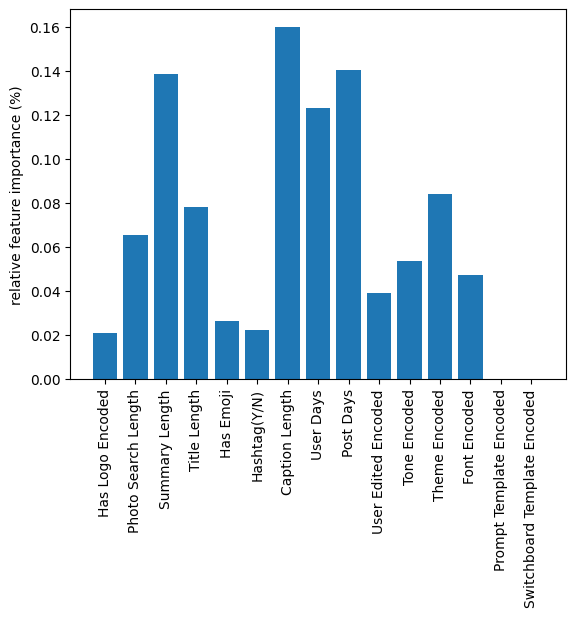

In [44]:
plt.bar(ran_forest.feature_names_in_,ran_forest.feature_importances_)
plt.xticks(rotation = 90)
plt.ylabel("relative feature importance (%)")
plt.show()